<a href="https://colab.research.google.com/github/2403a54123-web/NLP/blob/main/2403A54123_NLP_Lab_Assignment_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
!pip install gensim

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import gensim.downloader as api


In [9]:
model = api.load("glove-wiki-gigaword-100")  # 100-dim GloVe vectors

print("Vocabulary size:", len(model.index_to_key))
print("Example vector for 'computer':\n", model["computer"])


[==================================================] 100.0% 128.1/128.1MB downloaded
Vocabulary size: 400000
Example vector for 'computer':
 [-1.6298e-01  3.0141e-01  5.7978e-01  6.6548e-02  4.5835e-01 -1.5329e-01
  4.3258e-01 -8.9215e-01  5.7747e-01  3.6375e-01  5.6524e-01 -5.6281e-01
  3.5659e-01 -3.6096e-01 -9.9662e-02  5.2753e-01  3.8839e-01  9.6185e-01
  1.8841e-01  3.0741e-01 -8.7842e-01 -3.2442e-01  1.1202e+00  7.5126e-02
  4.2661e-01 -6.0651e-01 -1.3893e-01  4.7862e-02 -4.5158e-01  9.3723e-02
  1.7463e-01  1.0962e+00 -1.0044e+00  6.3889e-02  3.8002e-01  2.1109e-01
 -6.6247e-01 -4.0736e-01  8.9442e-01 -6.0974e-01 -1.8577e-01 -1.9913e-01
 -6.9226e-01 -3.1806e-01 -7.8565e-01  2.3831e-01  1.2992e-01  8.7721e-02
  4.3205e-01 -2.2662e-01  3.1549e-01 -3.1748e-01 -2.4632e-03  1.6615e-01
  4.2358e-01 -1.8087e+00 -3.6699e-01  2.3949e-01  2.5458e+00  3.6111e-01
  3.9486e-02  4.8607e-01 -3.6974e-01  5.7282e-02 -4.9317e-01  2.2765e-01
  7.9966e-01  2.1428e-01  6.9811e-01  1.1262e+00 -1.3526

In [10]:
words = [
    # Animals
    "cat","dog","lion","tiger","elephant","wolf","fox","zebra",

    # Countries/Cities
    "india","china","france","germany","tokyo","delhi","paris","london",

    # Technology
    "computer","laptop","phone","tablet","keyboard","mouse","internet","robot",

    # Fruits
    "apple","banana","orange","grape","mango","peach","pineapple","pear",

    # Vehicles
    "car","bus","train","bicycle","truck","airplane","ship","scooter"
]

vectors = np.array([model[w] for w in words if w in model])


In [11]:
tsne = TSNE(n_components=2, random_state=42, perplexity=5)
reduced_vectors = tsne.fit_transform(vectors)


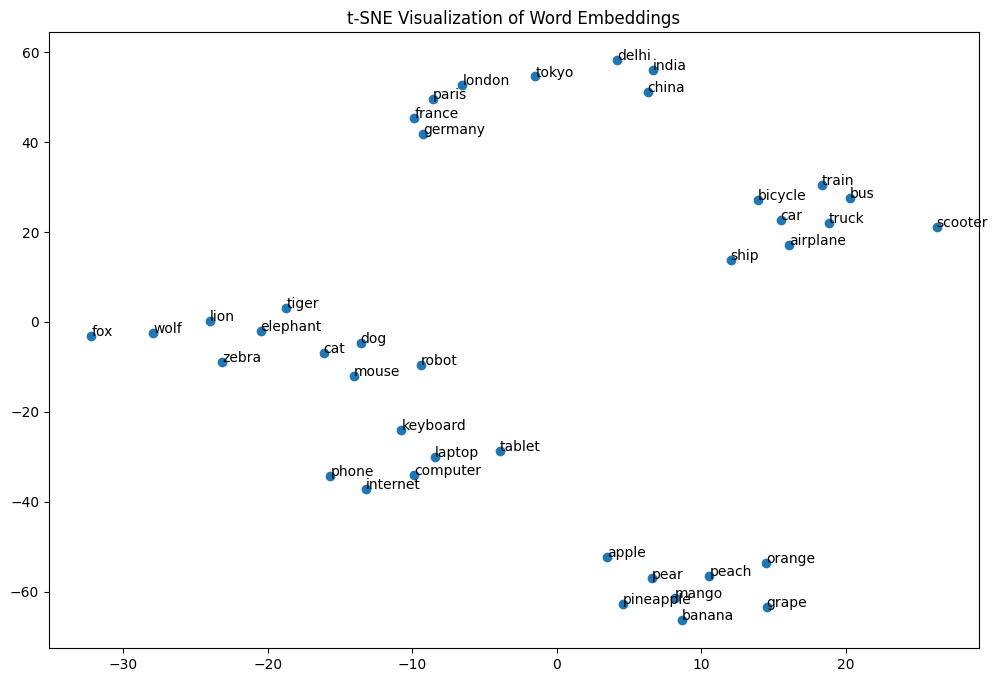

In [12]:
plt.figure(figsize=(12, 8))

plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1])

for i, word in enumerate(words):
    plt.annotate(word, (reduced_vectors[i, 0], reduced_vectors[i, 1]))

plt.title("t-SNE Visualization of Word Embeddings")
plt.show()


In [13]:
word2vec_model = api.load("word2vec-google-news-300")

print("Vocabulary Size:", len(word2vec_model.index_to_key))
print("\nExample vector for 'computer':\n", word2vec_model["computer"])


[==================================================] 100.0% 1662.8/1662.8MB downloaded
Vocabulary Size: 3000000

Example vector for 'computer':
 [ 1.07421875e-01 -2.01171875e-01  1.23046875e-01  2.11914062e-01
 -9.13085938e-02  2.16796875e-01 -1.31835938e-01  8.30078125e-02
  2.02148438e-01  4.78515625e-02  3.66210938e-02 -2.45361328e-02
  2.39257812e-02 -1.60156250e-01 -2.61230469e-02  9.71679688e-02
 -6.34765625e-02  1.84570312e-01  1.70898438e-01 -1.63085938e-01
 -1.09375000e-01  1.49414062e-01 -4.65393066e-04  9.61914062e-02
  1.68945312e-01  2.60925293e-03  8.93554688e-02  6.49414062e-02
  3.56445312e-02 -6.93359375e-02 -1.46484375e-01 -1.21093750e-01
 -2.27539062e-01  2.45361328e-02 -1.24511719e-01 -3.18359375e-01
 -2.20703125e-01  1.30859375e-01  3.66210938e-02 -3.63769531e-02
 -1.13281250e-01  1.95312500e-01  9.76562500e-02  1.26953125e-01
  6.59179688e-02  6.93359375e-02  1.02539062e-02  1.75781250e-01
 -1.68945312e-01  1.21307373e-03 -2.98828125e-01 -1.15234375e-01
  5.664062

In [14]:
words = [
    "cat","dog","lion","tiger","elephant","wolf","fox","zebra",
    "india","china","france","germany","tokyo","delhi","paris","london",
    "computer","laptop","phone","tablet","keyboard","mouse","internet","robot",
    "apple","banana","orange","grape","mango","peach","pineapple","pear",
    "car","bus","train","bicycle","truck","airplane","ship","scooter"
]

vectors = np.array([word2vec_model[w] for w in words if w in word2vec_model])


In [15]:
tsne = TSNE(n_components=2, random_state=42, perplexity=5)
reduced_vectors = tsne.fit_transform(vectors)


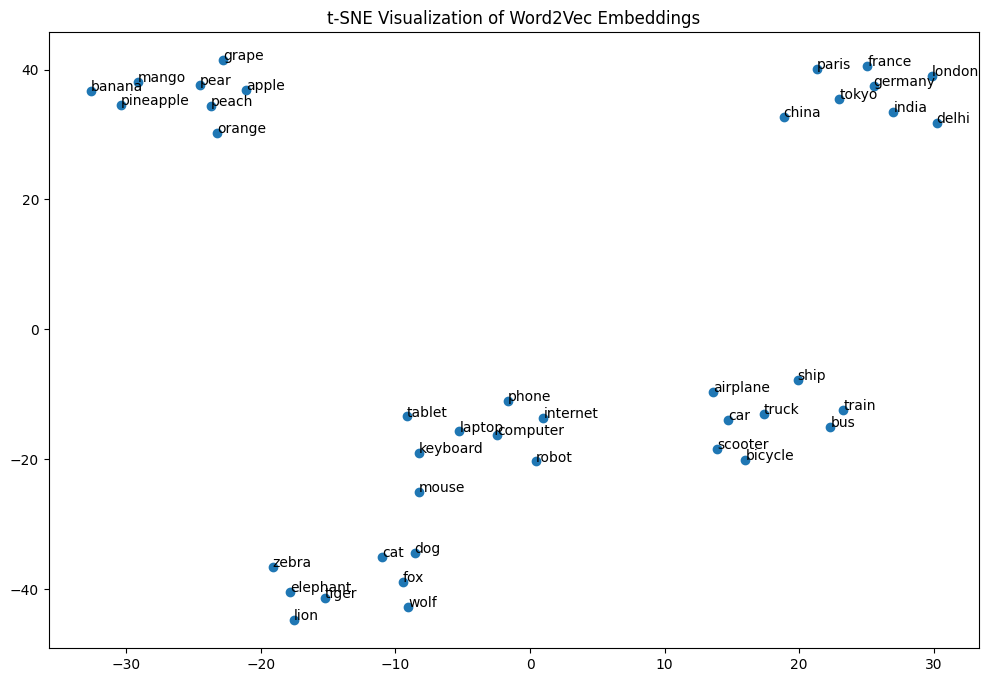

In [16]:
plt.figure(figsize=(12,8))
plt.scatter(reduced_vectors[:,0], reduced_vectors[:,1])

for i, word in enumerate(words):
    plt.annotate(word, (reduced_vectors[i,0], reduced_vectors[i,1]))

plt.title("t-SNE Visualization of Word2Vec Embeddings")
plt.show()
